# Project 9 -- Simrith Ranjan

**TA Help:** John Smith, Alice Jones

- Help with figuring out how to write a function.
    
**Collaboration:** Friend1, Friend2
    
- Helped figuring out how to load the dataset.
- Helped debug error with my plot.

## Question 1

In [1]:
myDF <- read.csv("/anvil/projects/tdm/data/restaurant/orders.csv")

In [2]:
benfords_law <- function(d) log10(1+1/d)

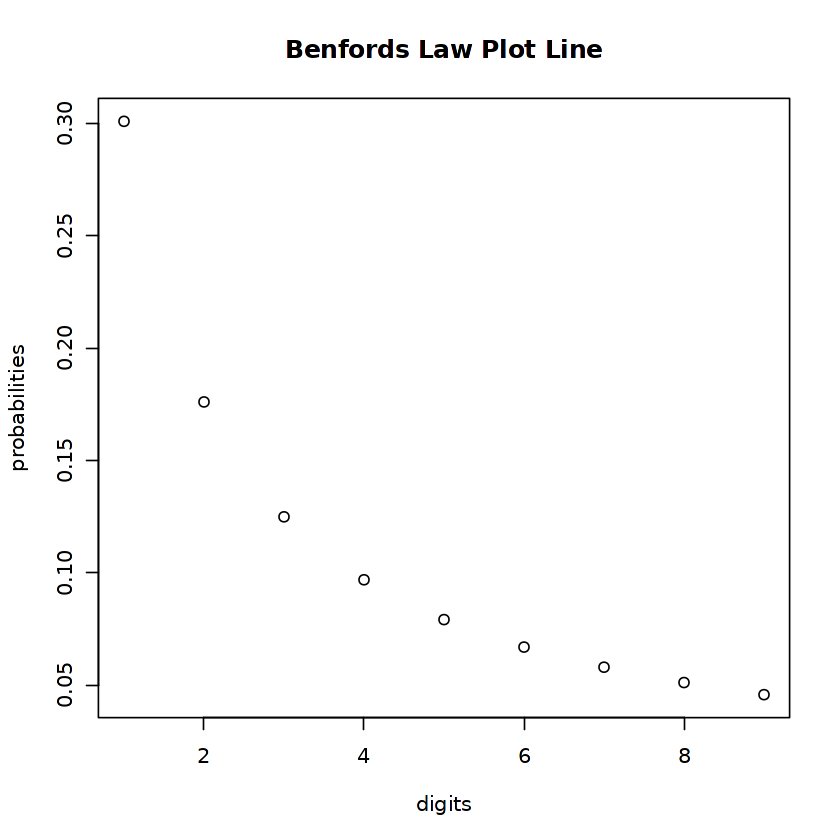

In [3]:
digits <-1:9
bf_val<-benfords_law(digits)
plot(digits, bf_val, xlab = "digits", ylab="probabilities", main="Benfords Law Plot Line")

In [4]:
benfords_law(3)

[1] 0.1249387

## Question 2

In [5]:
-6834.52 # want to return 6

[1] -6834.52

In [6]:
7223.0026 # want to return 7

[1] 7223.003

In [7]:
0.000037291 # want to return 3

[1] 3.7291e-05

In [8]:
first_digit <- function(number){
    number <- abs(number)
    if(number!=0) {
        while(number>=10){
            number<- number / 10
        }
        while(number < 1) {
            number <- number * 10
        }
        number <- floor(number)
    }
    return(number)
}

In [9]:
first_digit(-6834.52)

[1] 6

In [10]:
first_digit(7223.0026)

[1] 7

In [11]:
first_digit(0.000037291)

[1] 3

## Question 3

In [18]:
library(data.table)

In [19]:
myDF <- fread("/anvil/projects/tdm/data/restaurant/orders.csv")

In [20]:
head(myDF)

akeed_order_id,customer_id,item_count,grand_total,payment_mode,promo_code,vendor_discount_amount,promo_code_discount_percentage,is_favorite,is_rated,...,driver_accepted_time,ready_for_pickup_time,picked_up_time,delivered_time,delivery_date,vendor_id,created_at,LOCATION_NUMBER,LOCATION_TYPE,CID X LOC_NUM X VENDOR
<dbl>,<chr>,<dbl>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<chr>,<chr>,...,<dttm>,<dttm>,<dttm>,<dttm>,<dttm>,<int>,<dttm>,<int>,<chr>,<chr>
163238,92PEE24,1,7.6,2,,0,NA,,No,...,NA,NA,NA,NA,2019-07-31 05:30:00,105,2019-08-01 05:30:16,0,,92PEE24 X 0 X 105
163240,QS68UD8,1,8.7,1,,0,NA,,No,...,NA,NA,NA,NA,2019-07-31 05:30:00,294,2019-08-01 05:31:10,0,Work,QS68UD8 X 0 X 294
163241,MB7VY5F,2,14.4,1,,0,NA,,No,...,NA,NA,NA,NA,2019-07-31 05:30:00,83,2019-08-01 05:31:33,0,,MB7VY5F X 0 X 83
163244,KDJ951Y,1,7.1,1,,0,NA,,No,...,NA,NA,NA,NA,2019-07-31 05:30:00,90,2019-08-01 05:34:54,0,Home,KDJ951Y X 0 X 90
163245,BAL0RVT,4,27.2,1,,0,NA,,No,...,NA,NA,NA,NA,2019-07-31 05:30:00,83,2019-08-01 05:35:51,0,Work,BAL0RVT X 0 X 83
163246,U263OCD,3,18.2,2,,0,NA,,No,...,NA,NA,NA,NA,2019-07-31 05:30:00,83,2019-08-01 05:37:05,0,Work,U263OCD X 0 X 83


In [21]:
head(myDF$grand_total)

[1]  7.6  8.7 14.4  7.1 27.2 18.2

In [22]:
sapply(head(myDF$grand_total), first_digit)

[1] 7 8 1 7 2 1

In [23]:
myDF$fd_grand_total <- sapply(myDF$grand_total, first_digit)

In [17]:
first_digit(0)

[1] 0

In [24]:
head(myDF$fd_grand_total, n=30)

[1] 7 8 1 7 2 1 1 1 9 1 8 1 5 1 3 1 1 4 4 7 4 2 4 9 1 5 9 5 5 7

## Question 4

In [25]:
table(myDF$fd_grand_total)


    0     1     2     3     4     5     6     7     8     9 
  683 53892 17230  8246  7173  7915  9509 10314  9503 10838 

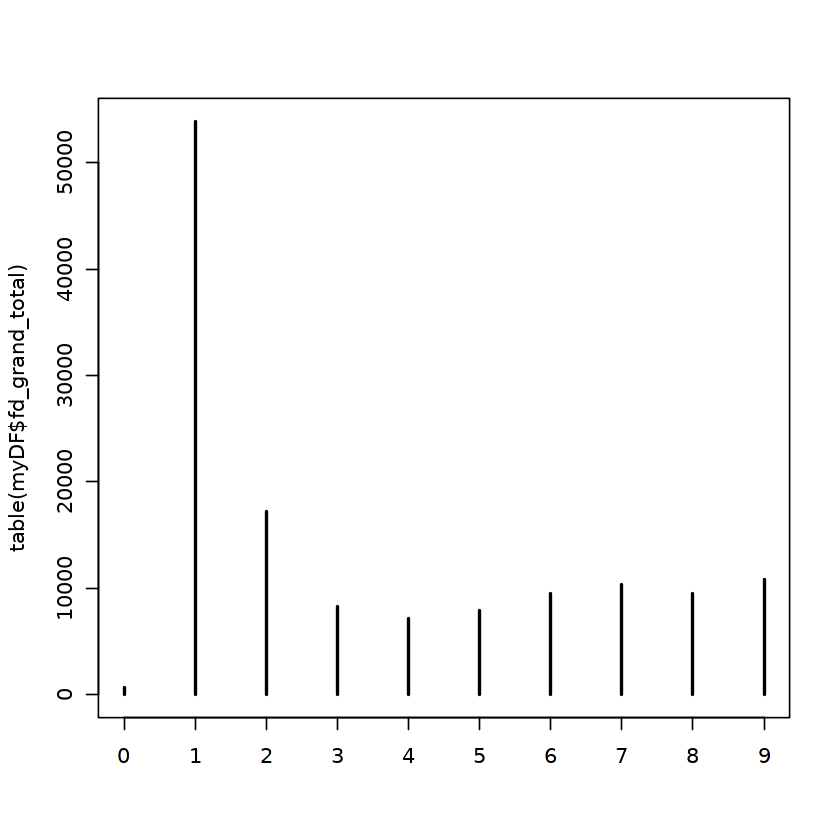

In [27]:
plot(table(myDF$fd_grand_total))

The law applies well to 1-4, but kinda stops working after that

[1] 0.000000e+00 7.390819e-06 1.478164e-05 2.217246e-05 2.956328e-05
 [6] 3.695410e-05 4.434491e-05 5.173573e-05 5.912655e-05 6.651737e-05

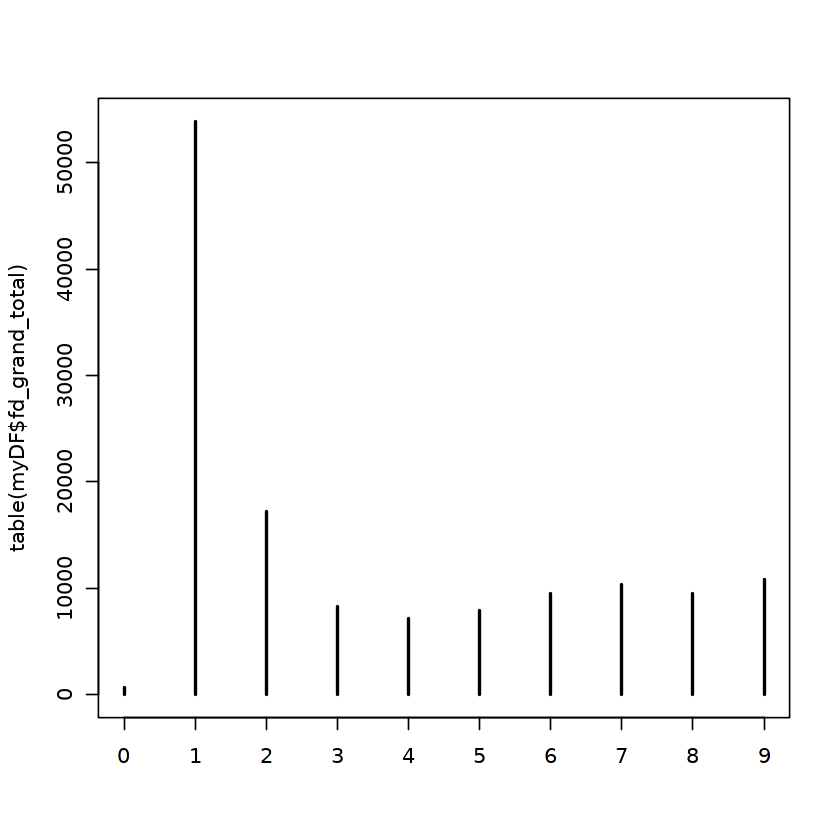

In [28]:
plot(table(myDF$fd_grand_total)) / length(myDF$fd_grand_total)

## Question 5

In [37]:
(head(myDF$delivery_date, n =10)) 

 [1] "2019-07-31 05:30:00 UTC" "2019-07-31 05:30:00 UTC"
 [3] "2019-07-31 05:30:00 UTC" "2019-07-31 05:30:00 UTC"
 [5] "2019-07-31 05:30:00 UTC" "2019-07-31 05:30:00 UTC"
 [7] "2019-07-31 05:30:00 UTC" "2019-07-31 05:30:00 UTC"
 [9] "2019-07-31 05:30:00 UTC" "2019-07-31 05:30:00 UTC"

In [32]:
as.Date(head(myDF$delivery_date, n =10)) <= as.Date("2019-09-15")

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE

In [33]:
as.Date(head(myDF$delivery_date, n =10)) <= as.Date("2019-02-15")

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE

In [30]:
tail(myDF$delivery_date)

[1] NA NA NA NA NA NA

In [35]:
find_orders <- function(start_date, end_date) {
    orders_by_dates <- subset(myDF, ((myDF$delivery_date >= start_date) & (myDF$delivery_date <= end_date)))
    return(orders_by_dates)
}

In [36]:
dim(myDF)

[1] 135303     27

In [39]:
myresultDF <- find_orders("2019-07-31", "2019-08-01")
dim(myresultDF)

[1] 375  27

In [40]:
myresultDF <- find_orders("2019-07-05", "2019-08-01")
dim(myresultDF)

[1] 8738   27

In [41]:
head(myresultDF)

akeed_order_id,customer_id,item_count,grand_total,payment_mode,promo_code,vendor_discount_amount,promo_code_discount_percentage,is_favorite,is_rated,...,ready_for_pickup_time,picked_up_time,delivered_time,delivery_date,vendor_id,created_at,LOCATION_NUMBER,LOCATION_TYPE,CID X LOC_NUM X VENDOR,fd_grand_total
<dbl>,<chr>,<dbl>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<chr>,<chr>,...,<dttm>,<dttm>,<dttm>,<dttm>,<int>,<dttm>,<int>,<chr>,<chr>,<dbl>
163238,92PEE24,1,7.6,2,,0,NA,,No,...,NA,NA,NA,2019-07-31 05:30:00,105,2019-08-01 05:30:16,0,,92PEE24 X 0 X 105,7
163240,QS68UD8,1,8.7,1,,0,NA,,No,...,NA,NA,NA,2019-07-31 05:30:00,294,2019-08-01 05:31:10,0,Work,QS68UD8 X 0 X 294,8
163241,MB7VY5F,2,14.4,1,,0,NA,,No,...,NA,NA,NA,2019-07-31 05:30:00,83,2019-08-01 05:31:33,0,,MB7VY5F X 0 X 83,1
163244,KDJ951Y,1,7.1,1,,0,NA,,No,...,NA,NA,NA,2019-07-31 05:30:00,90,2019-08-01 05:34:54,0,Home,KDJ951Y X 0 X 90,7
163245,BAL0RVT,4,27.2,1,,0,NA,,No,...,NA,NA,NA,2019-07-31 05:30:00,83,2019-08-01 05:35:51,0,Work,BAL0RVT X 0 X 83,2
163246,U263OCD,3,18.2,2,,0,NA,,No,...,NA,NA,NA,2019-07-31 05:30:00,83,2019-08-01 05:37:05,0,Work,U263OCD X 0 X 83,1


## Pledge

By submitting this work I hereby pledge that this is my own, personal work. I've acknowledged in the designated place at the top of this file all sources that I used to complete said work, including but not limited to: online resources, books, and electronic communications. I've noted all collaboration with fellow students and/or TA's. I did not copy or plagiarize another's work.

> As a Boilermaker pursuing academic excellence, I pledge to be honest and true in all that I do. Accountable together – We are Purdue.